# Setup 

In [2]:
# Python ≥3.5 is required
#import sys #
# Scikit-Learn ≥0.20 is required
import sklearn # general ml package

# Common imports
import numpy as np # fundamental package for scientific computing
import os # to run file I/O operation 

import numpy as np
from scipy import linalg as LA
import math
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
# any number will do, as long as it is used consistently
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  """Save the selected figure into disc under an image extention and resolution

  Parameters
  ----------
  fig_id : figure handle
    The id number of the figure
  tight_layout : boolean (True or False)
    Specifies whenther the layout should be tight or not
  fig_extension: string
    Under what extension should the file be saved ("png" or "jpg")
  resolution: int
    the quality of the figure (ie. 100,200,300)

  Returns
  -------
  void
    Does not return any value
  """

  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

# Getting Data 

In [3]:
files.upload()

Saving housing.csv to housing.csv


{'housing.csv': b' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00\n 0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80 396.90   9.14  21.60\n 0.02729   0.00   7.070  0  0.4690  7.1850  61.10  4.9671   2  242.0  17.80 392.83   4.03  34.70\n 0.03237   0.00   2.180  0  0.4580  6.9980  45.80  6.0622   3  222.0  18.70 394.63   2.94  33.40\n 0.06905   0.00   2.180  0  0.4580  7.1470  54.20  6.0622   3  222.0  18.70 396.90   5.33  36.20\n 0.02985   0.00   2.180  0  0.4580  6.4300  58.70  6.0622   3  222.0  18.70 394.12   5.21  28.70\n 0.08829  12.50   7.870  0  0.5240  6.0120  66.60  5.5605   5  311.0  15.20 395.60  12.43  22.90\n 0.14455  12.50   7.870  0  0.5240  6.1720  96.10  5.9505   5  311.0  15.20 396.90  19.15  27.10\n 0.21124  12.50   7.870  0  0.5240  5.6310 100.00  6.0821   5  311.0  15.20 386.63  29.93  16.50\n 0.17004  12.50   7.870  0  0.5240  6.0040  85.90  6.5921   5  311.0  15.20 386.71  17.10  18.90\n 0

In [4]:
header_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
              'DIS', 'RAD', 'TAX', 'PTRATION', 'B', 'LSTAT', 'PRICE']
housing = pd.read_csv("housing.csv", names=header_names, delim_whitespace=True)


In [5]:
housing.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [6]:
housing.shape

(506, 14)

In [7]:
# Provide a quick summary of the data including name of features, count, and type
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    float64
 10  PTRATION  506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  PRICE     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
# Provide some basic statistics about the dataset
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


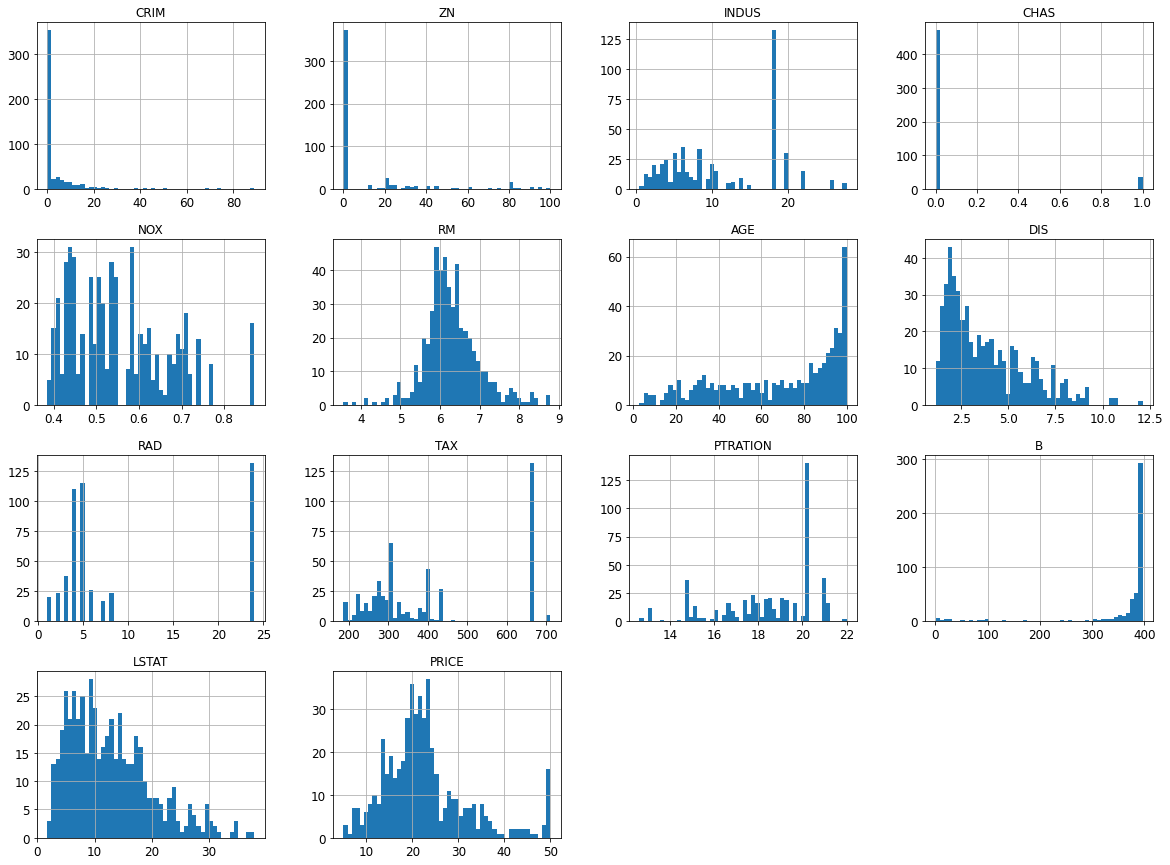

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

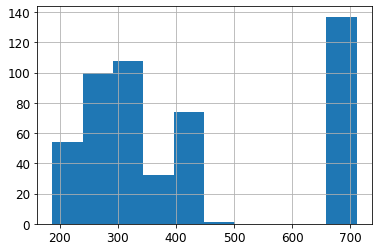

In [10]:
#Tax is tail heavy
housing["TAX"].hist()

In [11]:
#Redistributing Tail column data 
sdk = pd.cut(housing["TAX"],
                               bins=[150, 180, 210, 230, 260, 290, 320, 350, 380, 410, 440, 470, 500, np.inf],
                               labels=[150, 180, 210, 230, 260, 290, 320, 350, 380, 410, 440, 470, 500])

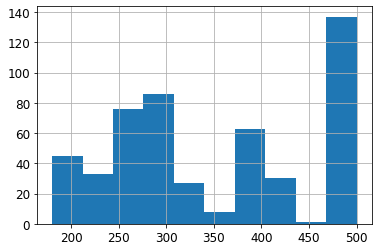

In [12]:
#Redistributed Tail data does not follow bell-shaped curve as closely as wanted 
sdk.hist()

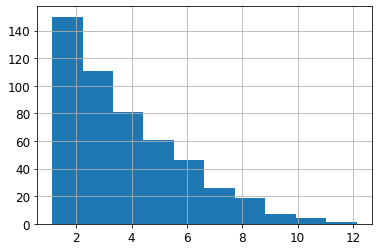

In [13]:
#Choose DIS feature because tail heavy and doesn't have that many outliers
housing["DIS"].hist()

In [14]:
#Redistribute Data for DIS feature
housing["dist_cat"]= pd.cut(housing["DIS"], bins=[1, 1.5, 2.5, 5, 7,8, np.inf],
                               labels=[1, 2, 3, 4, 5,6])

In [15]:
#Check value counts to ensure bell-shaped distribution is followed
housing["dist_cat"].value_counts()

3    183
2    159
4     86
1     29
5     27
6     22
Name: dist_cat, dtype: int64

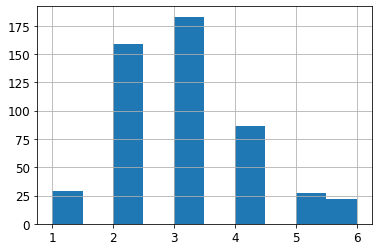

In [16]:
# bell shaped distribution for distance
housing["dist_cat"].hist()

In [17]:
#checking data stats and summary after additiion of column dist_cat
housing.shape

(506, 15)

In [18]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CRIM      506 non-null    float64 
 1   ZN        506 non-null    float64 
 2   INDUS     506 non-null    float64 
 3   CHAS      506 non-null    int64   
 4   NOX       506 non-null    float64 
 5   RM        506 non-null    float64 
 6   AGE       506 non-null    float64 
 7   DIS       506 non-null    float64 
 8   RAD       506 non-null    int64   
 9   TAX       506 non-null    float64 
 10  PTRATION  506 non-null    float64 
 11  B         506 non-null    float64 
 12  LSTAT     506 non-null    float64 
 13  PRICE     506 non-null    float64 
 14  dist_cat  506 non-null    category
dtypes: category(1), float64(12), int64(2)
memory usage: 56.2 KB


In [19]:
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,PRICE,dist_cat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,3
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,3
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,3
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,2
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,2
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,2
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,2


In [20]:
#Perform stratified sampling for rest of data to be redistributed and follow bell-shaped distribution like the feature dist_cat
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["dist_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [21]:
#Checking if redistribution percentages align between dist_cat feature and the whole data set
print(strat_test_set["dist_cat"].value_counts() / len(strat_test_set))
print(housing["dist_cat"].value_counts() / len(housing))

3    0.362745
2    0.313725
4    0.166667
5    0.058824
1    0.058824
6    0.039216
Name: dist_cat, dtype: float64
3    0.361660
2    0.314229
4    0.169960
1    0.057312
5    0.053360
6    0.043478
Name: dist_cat, dtype: float64


# Discover and visualize the data to gain insights

In [22]:
#Drop dist_cat column 
for set_ in (strat_train_set, strat_test_set):
    set_.drop("dist_cat", axis = 1, inplace=True)

In [23]:
#Set housing to stratified training set copy 
housing = strat_train_set.copy()
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,PRICE
302,0.09266,34.0,6.09,0,0.433,6.495,18.4,5.4917,7,329.0,16.1,383.61,8.67,26.4
250,0.14030,22.0,5.86,0,0.431,6.487,13.0,7.3967,7,330.0,19.1,396.28,5.90,24.4
474,8.05579,0.0,18.10,0,0.584,5.427,95.4,2.4298,24,666.0,20.2,352.58,18.14,13.8
327,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287.0,19.6,396.90,12.79,22.2
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53,32.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85,6.58,23.1
363,4.22239,0.0,18.10,1,0.770,5.803,89.0,1.9047,24,666.0,20.2,353.04,14.64,16.8
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666.0,20.2,27.49,18.05,9.6
51,0.04337,21.0,5.64,0,0.439,6.115,63.0,6.8147,4,243.0,16.8,393.97,9.43,20.5


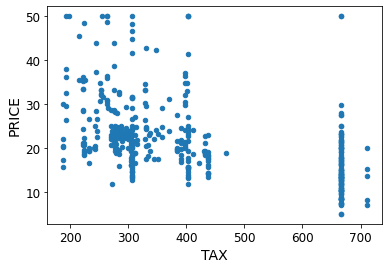

In [24]:
#plotting relationship between property value and tax
housing.plot(kind="scatter", x="TAX", y="PRICE")

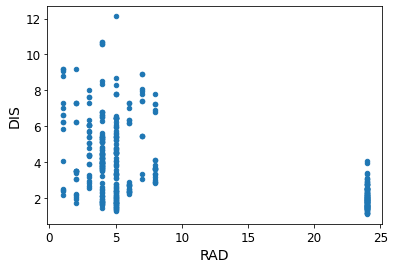

In [25]:
#plotting relationship between radial highway accessibility and employment center distances 
housing.plot(kind="scatter", x="RAD", y="DIS")

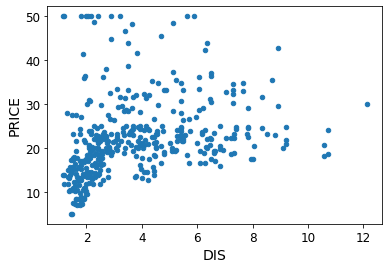

In [26]:
#plotting relationship between employment center distances and price of property(Median home value)
housing.plot(kind="scatter", x="DIS", y="PRICE")

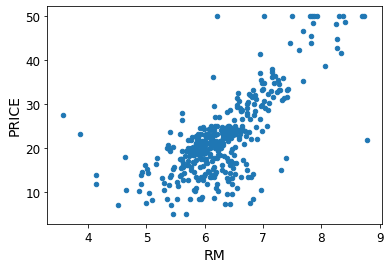

In [27]:
##plotting relationship between the number of rooms and price of property(Median home value) 
housing.plot(kind="scatter", x="RM", y="PRICE")

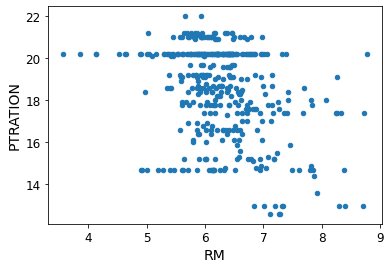

In [28]:
##plotting relationship between the number of rooms vs pupil-teacher ratio
housing.plot(kind="scatter", x="RM", y="PTRATION")

Feature Engineering 

In [29]:
#Adding more features to training set
housing['dis_rad'] = housing['DIS']/housing['RAD']
housing['tax_per_rm'] = housing['TAX']/housing['RM']

In [30]:
#ensure test set have same features
strat_test_set['dis_rad'] = strat_test_set['DIS']/strat_test_set['RAD']
strat_test_set['tax_per_rm'] = strat_test_set['TAX']/strat_test_set['RM']
strat_test_set.shape

(102, 16)

In [31]:
#checking data stats and summary after additiion of new features
housing.shape

(404, 16)

In [32]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,PRICE,dis_rad,tax_per_rm
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.806262,12.220297,11.182351,0.071782,0.556967,6.280339,68.880446,3.804314,9.584158,411.638614,18.483416,354.445520,12.874926,22.230446,0.986896,67.348568
std,9.174446,24.539248,6.934992,0.258447,0.118873,0.719698,28.034437,2.134521,8.721517,168.090142,2.165543,95.017861,7.333209,9.074565,1.326720,31.387422
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.047375,24.645639
25%,0.081960,0.000000,5.130000,0.000000,0.449000,5.886250,45.325000,2.084875,4.000000,283.250000,17.400000,376.140000,6.772500,16.475000,0.130794,44.719747
50%,0.266005,0.000000,9.690000,0.000000,0.538000,6.208500,77.150000,3.239250,5.000000,334.000000,19.100000,391.385000,11.570000,21.050000,0.672360,53.774674
75%,3.681942,13.875000,18.100000,0.000000,0.624000,6.608500,94.150000,5.218725,24.000000,666.000000,20.200000,396.060000,17.270000,24.850000,1.191775,97.704456
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,9.220300,187.026116


In [33]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 302 to 181
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        404 non-null    float64
 1   ZN          404 non-null    float64
 2   INDUS       404 non-null    float64
 3   CHAS        404 non-null    int64  
 4   NOX         404 non-null    float64
 5   RM          404 non-null    float64
 6   AGE         404 non-null    float64
 7   DIS         404 non-null    float64
 8   RAD         404 non-null    int64  
 9   TAX         404 non-null    float64
 10  PTRATION    404 non-null    float64
 11  B           404 non-null    float64
 12  LSTAT       404 non-null    float64
 13  PRICE       404 non-null    float64
 14  dis_rad     404 non-null    float64
 15  tax_per_rm  404 non-null    float64
dtypes: float64(14), int64(2)
memory usage: 53.7 KB


In [34]:
#FIGURE OUT WHICH FEATURES CORRELATE BEST WITH PRICE (Median Value)
corr_matrix = housing.corr()
corr_matrix.shape

(16, 16)

In [35]:
corr_matrix["PRICE"].sort_values(ascending=False)

PRICE         1.000000
RM            0.716560
ZN            0.376466
B             0.354711
DIS           0.287706
dis_rad       0.215687
CHAS          0.141053
CRIM         -0.393397
RAD          -0.409904
AGE          -0.416680
NOX          -0.454487
TAX          -0.494569
INDUS        -0.515723
PTRATION     -0.527471
tax_per_rm   -0.569704
LSTAT        -0.734823
Name: PRICE, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5454f9c50>,
      dtype=object)

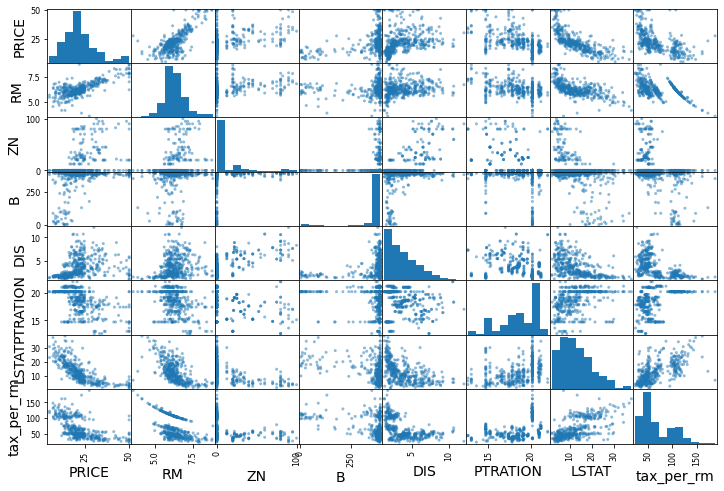

In [36]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["PRICE", "RM", "ZN",
              "B", "DIS", "PTRATION", "LSTAT", "tax_per_rm"]
            #features have the strongest correlations, both negative and positive, to property price 
scatter_matrix(housing[attributes], figsize=(12, 8))

In [37]:
#train set now has added features
strat_train_set = housing

# Data Cleaning

In [38]:
# Create the features and labels for training
housing = strat_train_set.drop("PRICE", axis=1) # drop labels for training set
housing_labels = strat_train_set["PRICE"].copy()

In [39]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,dis_rad,tax_per_rm
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.806262,12.220297,11.182351,0.071782,0.556967,6.280339,68.880446,3.804314,9.584158,411.638614,18.483416,354.445520,12.874926,0.986896,67.348568
std,9.174446,24.539248,6.934992,0.258447,0.118873,0.719698,28.034437,2.134521,8.721517,168.090142,2.165543,95.017861,7.333209,1.326720,31.387422
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.730000,0.047375,24.645639
25%,0.081960,0.000000,5.130000,0.000000,0.449000,5.886250,45.325000,2.084875,4.000000,283.250000,17.400000,376.140000,6.772500,0.130794,44.719747
50%,0.266005,0.000000,9.690000,0.000000,0.538000,6.208500,77.150000,3.239250,5.000000,334.000000,19.100000,391.385000,11.570000,0.672360,53.774674
75%,3.681942,13.875000,18.100000,0.000000,0.624000,6.608500,94.150000,5.218725,24.000000,666.000000,20.200000,396.060000,17.270000,1.191775,97.704456
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,9.220300,187.026116


In [40]:
# Check to see if there's any missing value in the data with .isnull()
print(housing[housing.isnull().any(axis=1)])
print(housing.isnull().values.any())
#there are no NAs

Empty DataFrame
Columns: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATION, B, LSTAT, dis_rad, tax_per_rm]
Index: []
False


In [41]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [42]:
#numerical variables 
housing_num = housing.drop("CHAS", axis=1)

In [43]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [44]:
imputer.statistics_

array([2.66005000e-01, 0.00000000e+00, 9.69000000e+00, 5.38000000e-01,
       6.20850000e+00, 7.71500000e+01, 3.23925000e+00, 5.00000000e+00,
       3.34000000e+02, 1.91000000e+01, 3.91385000e+02, 1.15700000e+01,
       6.72360000e-01, 5.37746744e+01])

In [45]:
housing_num.median().values

array([2.66005000e-01, 0.00000000e+00, 9.69000000e+00, 5.38000000e-01,
       6.20850000e+00, 7.71500000e+01, 3.23925000e+00, 5.00000000e+00,
       3.34000000e+02, 1.91000000e+01, 3.91385000e+02, 1.15700000e+01,
       6.72360000e-01, 5.37746744e+01])

In [46]:
X = imputer.transform(housing_num)
print(X)

[[9.26600000e-02 3.40000000e+01 6.09000000e+00 ... 8.67000000e+00
  7.84528571e-01 5.06543495e+01]
 [1.40300000e-01 2.20000000e+01 5.86000000e+00 ... 5.90000000e+00
  1.05667143e+00 5.08709727e+01]
 [8.05579000e+00 0.00000000e+00 1.81000000e+01 ... 1.81400000e+01
  1.01241667e-01 1.22719735e+02]
 ...
 [1.44208000e+01 0.00000000e+00 1.81000000e+01 ... 1.80500000e+01
  8.34416667e-02 1.03080019e+02]
 [4.33700000e-02 2.10000000e+01 5.64000000e+00 ... 9.43000000e+00
  1.70367500e+00 3.97383483e+01]
 [6.88800000e-02 0.00000000e+00 2.46000000e+00 ... 9.45000000e+00
  8.65966667e-01 3.14127604e+01]]


In [47]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [48]:
housing_tr.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,dis_rad,tax_per_rm
302,0.09266,34.0,6.09,0.433,6.495,18.4,5.4917,7.0,329.0,16.1,383.61,8.67,0.784529,50.654349
250,0.14030,22.0,5.86,0.431,6.487,13.0,7.3967,7.0,330.0,19.1,396.28,5.90,1.056671,50.870973
474,8.05579,0.0,18.10,0.584,5.427,95.4,2.4298,24.0,666.0,20.2,352.58,18.14,0.101242,122.719735
327,0.24103,0.0,7.38,0.493,6.083,43.7,5.4159,5.0,287.0,19.6,396.90,12.79,1.083180,47.180667
274,0.05644,40.0,6.41,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,1.019400,37.585084


In [49]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 302 to 181
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        404 non-null    float64
 1   ZN          404 non-null    float64
 2   INDUS       404 non-null    float64
 3   NOX         404 non-null    float64
 4   RM          404 non-null    float64
 5   AGE         404 non-null    float64
 6   DIS         404 non-null    float64
 7   RAD         404 non-null    float64
 8   TAX         404 non-null    float64
 9   PTRATION    404 non-null    float64
 10  B           404 non-null    float64
 11  LSTAT       404 non-null    float64
 12  dis_rad     404 non-null    float64
 13  tax_per_rm  404 non-null    float64
dtypes: float64(14)
memory usage: 47.3 KB


In [50]:
#categorical variables
housing_cat = housing[["CHAS"]]

## Pipelines

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [52]:
housing_num_tr

array([[-0.40527857,  0.88864616, -0.73520857, ..., -0.5741197 ,
        -0.15272148, -0.53253554],
       [-0.40007944,  0.39902727, -0.76841483, ..., -0.95232176,
         0.0526574 , -0.52562539],
       [ 0.46376611, -0.49860735,  0.99873594, ...,  0.71886712,
        -0.66837969,  1.76630699],
       ...,
       [ 1.15840227, -0.49860735,  0.99873594, ...,  0.70657896,
        -0.68181287,  1.13981184],
       [-0.41065776,  0.3582257 , -0.80017735, ..., -0.47035307,
         0.54093355, -0.88074942],
       [-0.40787376, -0.49860735, -1.25929005, ..., -0.46762237,
        -0.09126235, -1.14633068]])

In [53]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["CHAS"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [54]:
# housing_prepared
print(housing.shape)
print(housing_prepared.shape)
housing_prepared_df = pd.DataFrame(housing_prepared, columns=housing_num.columns,
                          index=housing_num.index)

(404, 15)
(404, 14)


In [55]:
housing_prepared_df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,dis_rad,tax_per_rm
302,-0.405279,0.888646,-0.735209,-1.044149,0.298635,-1.802891,0.791502,-0.296664,-0.492242,-1.101974,0.307317,-0.574120,-0.152721,-0.532536
250,-0.400079,0.399027,-0.768415,-1.060994,0.287505,-1.995750,1.685081,-0.296664,-0.486286,0.285078,0.440826,-0.952322,0.052657,-0.525625
474,0.463766,-0.498607,0.998736,0.227693,-1.187160,0.947136,-0.644743,1.654955,1.515120,0.793664,-0.019658,0.718867,-0.668380,1.766307
327,-0.389086,-0.498607,-0.548965,-0.538781,-0.274537,-0.899311,0.755947,-0.526267,-0.742418,0.516253,0.447359,-0.011595,0.072663,-0.643344
274,-0.409231,1.133456,-0.689009,-0.926230,0.664519,-1.285029,0.128190,-0.641068,-0.938985,-0.408448,0.447359,-1.275910,0.024530,-0.949437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,-0.300372,-0.498607,-0.439240,-0.159756,-0.480434,-1.413601,0.325669,-0.641068,-0.623287,1.163544,0.341459,-0.859478,0.103959,-0.498317
363,0.045414,-0.498607,0.998736,1.794332,-0.664071,0.718563,-0.891052,1.654955,1.515120,0.793664,-0.014811,0.240994,-0.684891,1.512659
436,1.158402,-0.498607,0.998736,1.541648,0.251334,0.872136,-0.845130,1.654955,1.515120,0.793664,-3.445257,0.706579,-0.681813,1.139812
51,-0.410658,0.358226,-0.800177,-0.993612,-0.230019,-0.210018,1.412082,-0.641068,-1.004507,-0.778328,0.416485,-0.470353,0.540934,-0.880749


In [56]:
housing_prepared_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 302 to 181
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        404 non-null    float64
 1   ZN          404 non-null    float64
 2   INDUS       404 non-null    float64
 3   NOX         404 non-null    float64
 4   RM          404 non-null    float64
 5   AGE         404 non-null    float64
 6   DIS         404 non-null    float64
 7   RAD         404 non-null    float64
 8   TAX         404 non-null    float64
 9   PTRATION    404 non-null    float64
 10  B           404 non-null    float64
 11  LSTAT       404 non-null    float64
 12  dis_rad     404 non-null    float64
 13  tax_per_rm  404 non-null    float64
dtypes: float64(14)
memory usage: 47.3 KB


# Select and train a model

## Linear regression model

In [57]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
# Trying the full preprocessing pipeline on training instances 
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [28.7355647  25.50724146 16.56016563 20.13471039 33.08385027]


In [59]:
#actual values
print("Labels:", list(some_labels))

Labels: [26.4, 24.4, 13.8, 22.2, 32.4]


In [60]:
#outcome of passing data through pipeline
some_data_prepared

array([[-0.40527857,  0.88864616, -0.73520857, -1.04414882,  0.29863493,
        -1.80289111,  0.79150242, -0.29666428, -0.49224231, -1.10197367,
         0.3073174 , -0.5741197 , -0.15272148, -0.53253554],
       [-0.40007944,  0.39902727, -0.76841483, -1.06099441,  0.28750537,
        -1.99575019,  1.68508099, -0.29666428, -0.48628574,  0.28507804,
         0.44082609, -0.95232176,  0.0526574 , -0.52562539],
       [ 0.46376611, -0.49860735,  0.99873594,  0.22769265, -1.18716018,
         0.94713643, -0.64474338,  1.65495476,  1.51512023,  0.79366367,
        -0.0196577 ,  0.71886712, -0.66837969,  1.76630699],
       [-0.38908642, -0.49860735, -0.54896474, -0.53878135, -0.27453697,
        -0.89931063,  0.7559469 , -0.52626652, -0.74241806,  0.51625332,
         0.44735927, -0.01159534,  0.0726627 , -0.64334391],
       [-0.40923138,  1.1334556 , -0.68900855, -0.92622975,  0.66451893,
        -1.28502878,  0.12819036, -0.64106764, -0.93898471, -0.40844782,
         0.44735927, -1.27

In [61]:
#Calculating RMSE for linear model
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

3.785749470391746

## Decision Tree model

In [62]:
#Calculating RMSE for decision tree model--overfitting occurs!
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Random Forest model

In [63]:
#Calculating RMSE for Random Forest model - has the lowest RMSE!
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.2999834109756478

## XG Boost Model

In [64]:
#Calculating RMSE for XG Boost model (training set) - has the second lowest RMSE!
from xgboost import XGBRegressor

xg_reg = XGBRegressor(silent=True)
xg_reg.fit(housing_prepared, housing_labels)

housing_predictions = xg_reg.predict(housing_prepared)
xg_reg_mse = mean_squared_error(housing_labels, housing_predictions)
xg_reg_rmse = np.sqrt(xg_reg_mse)
xg_reg_rmse

1.4100481447601554

## Cross validation

In [65]:
#Helper function for viewing CV scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### Tree model

In [66]:
#CV for Tree model
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

Scores: [3.94511121 3.87977872 3.85265192 2.82950483 5.71777929 4.50890785
 5.1671317  6.52508621 2.76450719 4.73816948]
Mean: 4.392862838872203
Standard deviation: 1.1351286510635754


### Linear model

In [67]:
#CV for Linear model
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [2.83182799 3.38644228 3.8816403  2.82746166 6.09597129 3.32580733
 4.21954675 5.25662459 2.67761756 3.82432068]
Mean: 3.8327260450143
Standard deviation: 1.0537848164457209


### Random Forest Model

In [68]:
#CV for Random Forest model
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [2.53116768 3.40793642 2.78228073 2.51716418 5.50840935 2.8479201
 4.71046771 4.27445024 1.77598864 3.18711118]
Mean: 3.35428962136179
Standard deviation: 1.0867345563773032


### XG Boost Model

In [69]:
#CV for XG Boost model (validation set) - has the smallest RMSE so will choose this as final model!
xg_reg_scores = cross_val_score(xg_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
xg_reg_rmse_scores = np.sqrt(-xg_reg_scores)
display_scores(xg_reg_rmse_scores)

Scores: [2.23960288 2.63532298 3.19891696 2.25325834 4.35037392 2.81422871
 4.78019594 3.50292618 2.09061514 3.19106315]
Mean: 3.105650418473128
Standard deviation: 0.85675568517415


# Fine tuning model

## Grid Search CV

In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': list(range(1, 200)), 'max_features': [7], 'learning_rate': [.101], 'colsample_bylevel':[0.5], 'max_depth': [7]},
  ]

xG_reg = XGBRegressor(random_state=42, silent=True)
# train across 5 folds, that's a total of 4000 rounds of training 
grid_search = GridSearchCV(xG_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=42,
                                    reg_alpha=0, reg...
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid=[{'colsample_bylevel': [0.5], 'learning_rate': [0.101],
                          'max_depth': [7], 'max_features': [7],
                          'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,

In [71]:
grid_search.best_params_

{'colsample_bylevel': 0.5,
 'learning_rate': 0.101,
 'max_depth': 7,
 'max_features': 7,
 'n_estimators': 198}

In [72]:
# {'learning_rate': 0.07, 'max_features': 5, 'n_estimators': 279}

In [73]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.101, max_delta_step=0,
             max_depth=7, max_features=7, min_child_weight=1, missing=None,
             n_estimators=198, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=True, subsample=1, verbosity=1)

In [74]:
cvres = grid_search.cv_results_
# zip() is to combine the column "mean_test_score" with struct "params"
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

21.32984113090652 {'colsample_bylevel': 0.5, 'learning_rate': 0.101, 'max_depth': 7, 'max_features': 7, 'n_estimators': 1}
19.40271091591803 {'colsample_bylevel': 0.5, 'learning_rate': 0.101, 'max_depth': 7, 'max_features': 7, 'n_estimators': 2}
17.612340464255354 {'colsample_bylevel': 0.5, 'learning_rate': 0.101, 'max_depth': 7, 'max_features': 7, 'n_estimators': 3}
16.06091640983065 {'colsample_bylevel': 0.5, 'learning_rate': 0.101, 'max_depth': 7, 'max_features': 7, 'n_estimators': 4}
14.638063121551616 {'colsample_bylevel': 0.5, 'learning_rate': 0.101, 'max_depth': 7, 'max_features': 7, 'n_estimators': 5}
13.338278921715087 {'colsample_bylevel': 0.5, 'learning_rate': 0.101, 'max_depth': 7, 'max_features': 7, 'n_estimators': 6}
12.193913783333612 {'colsample_bylevel': 0.5, 'learning_rate': 0.101, 'max_depth': 7, 'max_features': 7, 'n_estimators': 7}
11.138989128089262 {'colsample_bylevel': 0.5, 'learning_rate': 0.101, 'max_depth': 7, 'max_features': 7, 'n_estimators': 8}
10.24772488

In [75]:
# View the research results in table format
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006356,0.000435,0.000573,0.000070,0.5,0.101,7,7,1,"{'colsample_bylevel': 0.5, 'learning_rate': 0....",-435.406665,-494.424575,-497.961912,-443.726250,-403.291212,-454.962123,36.289973,199,-458.248550,-444.156179,-443.710919,-455.852114,-465.029272,-453.399407,8.295635
1,0.006133,0.000222,0.000519,0.000035,0.5,0.101,7,7,2,"{'colsample_bylevel': 0.5, 'learning_rate': 0....",-358.575870,-412.822765,-413.630404,-366.980819,-330.316096,-376.465191,32.381619,198,-376.799305,-364.935080,-364.546949,-374.178218,-382.175705,-372.527051,6.861415
2,0.006188,0.000093,0.000485,0.000027,0.5,0.101,7,7,3,"{'colsample_bylevel': 0.5, 'learning_rate': 0....",-293.140489,-341.326267,-344.845419,-300.177272,-271.483236,-310.194537,28.494277,197,-309.639535,-299.917043,-299.355377,-307.271442,-313.967189,-306.030117,5.647791
3,0.006795,0.000105,0.000494,0.000025,0.5,0.101,7,7,4,"{'colsample_bylevel': 0.5, 'learning_rate': 0....",-242.954267,-282.908582,-291.605279,-249.340065,-222.956987,-257.953036,25.609071,196,-254.966474,-246.793819,-246.081364,-252.968293,-258.303100,-251.822610,4.721099
4,0.006953,0.000150,0.000468,0.000022,0.5,0.101,7,7,5,"{'colsample_bylevel': 0.5, 'learning_rate': 0....",-201.702179,-235.502501,-243.679118,-207.519213,-182.961449,-214.272892,22.358282,195,-210.234616,-203.317901,-202.612160,-208.342961,-212.363539,-207.374236,3.824776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.102652,0.000704,0.001950,0.000093,0.5,0.101,7,7,195,"{'colsample_bylevel': 0.5, 'learning_rate': 0....",-6.061803,-10.139700,-17.276826,-16.106954,-6.253630,-11.167783,4.753792,4,-0.000774,-0.000551,-0.000245,-0.000561,-0.000502,-0.000526,0.000169
195,0.105772,0.002373,0.002017,0.000019,0.5,0.101,7,7,196,"{'colsample_bylevel': 0.5, 'learning_rate': 0....",-6.063460,-10.139880,-17.276465,-16.106942,-6.252864,-11.167922,4.753492,8,-0.000738,-0.000519,-0.000234,-0.000549,-0.000488,-0.000506,0.000161
196,0.105747,0.001776,0.002054,0.000048,0.5,0.101,7,7,197,"{'colsample_bylevel': 0.5, 'learning_rate': 0....",-6.062972,-10.139533,-17.276791,-16.107053,-6.253133,-11.167896,4.753663,7,-0.000708,-0.000501,-0.000224,-0.000530,-0.000460,-0.000485,0.000155
197,0.116260,0.005141,0.002171,0.000047,0.5,0.101,7,7,198,"{'colsample_bylevel': 0.5, 'learning_rate': 0....",-6.063429,-10.138676,-17.276526,-16.105095,-6.252710,-11.167287,4.753214,1,-0.000691,-0.000490,-0.000222,-0.000510,-0.000426,-0.000468,0.000151


## Randomized Search CV

In [76]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import random

param_distribs = {
        'n_estimators': randint(low=100, high=1000),
        'max_features': randint(low=1, high=9),
        'learning_rate':np.arange(.01, .3, 0.01),
        'max_depth':randint(low=3, high=10),
        'colsample_bylevel':np.arange(.5, 1, 0.1),
    }

xG_reg = XGBRegressor(random_state=42, silent=True)
rnd_search = RandomizedSearchCV(xG_reg , param_distributions=param_distribs,
                                n_iter=300, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=42, reg_alpha...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff5332a9ed0>,
                                        'max_features': <scipy.

In [77]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3.7006416336575096 {'colsample_bylevel': 0.7999999999999999, 'learning_rate': 0.29000000000000004, 'max_depth': 9, 'max_features': 3, 'n_estimators': 171}
3.515985658076687 {'colsample_bylevel': 0.8999999999999999, 'learning_rate': 0.21000000000000002, 'max_depth': 9, 'max_features': 2, 'n_estimators': 566}
3.4965326193462363 {'colsample_bylevel': 0.7, 'learning_rate': 0.11, 'max_depth': 7, 'max_features': 4, 'n_estimators': 971}
3.5175918009958007 {'colsample_bylevel': 0.7, 'learning_rate': 0.22, 'max_depth': 7, 'max_features': 2, 'n_estimators': 443}
3.2477652841114946 {'colsample_bylevel': 0.7999999999999999, 'learning_rate': 0.060000000000000005, 'max_depth': 4, 'max_features': 8, 'n_estimators': 376}
3.3337280356570123 {'colsample_bylevel': 0.5, 'learning_rate': 0.12, 'max_depth': 4, 'max_features': 6, 'n_estimators': 352}
3.331994034820759 {'colsample_bylevel': 0.7999999999999999, 'learning_rate': 0.25, 'max_depth': 3, 'max_features': 3, 'n_estimators': 158}
3.640002251550197 {'c

In [78]:
#Creating dataframe with hyperparameter values and corresponding RMSE
rmse_vect = []
l_r = []
mx_f = []
estim = []
col_level = []
depth = []
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  l_r.append(params['learning_rate'])
  mx_f.append(params['max_features'])
  estim.append(params['n_estimators'])
  rmse_vect.append(np.sqrt(-mean_score))
  col_level.append(params['colsample_bylevel'])
  depth.append(params['max_depth'])

hyperparam_rmse = pd.DataFrame({'learning_rate': np.array(l_r), 'max_features': np.array(mx_f), 'n_estimators': np.array(estim), 'RMSE':rmse_vect, 'col_bylevel': col_level, 'max_depth': depth}, columns=['learning_rate', 'max_features', 'n_estimators', 'RMSE', 'col_bylevel', 'max_depth'])

hyperparam_rmse

,learning_rate,max_features,n_estimators,RMSE,col_bylevel,max_depth
0,0.29,3,171,3.700642,0.8,9
1,0.21,2,566,3.515986,0.9,9
2,0.11,4,971,3.496533,0.7,7
3,0.22,2,443,3.517592,0.7,7
4,0.06,8,376,3.247765,0.8,4
...,...,...,...,...,...,...
295,0.25,3,542,3.628791,0.5,9
296,0.08,1,338,3.400817,0.9,8
297,0.03,1,703,3.335111,0.9,5
298,0.03,8,219,3.315163,0.6,8


In [79]:
#Finding correlation between different hyperparameters and label and correlations between themselves
hyperP_corr_matrix = hyperparam_rmse.corr()
print(hyperP_corr_matrix.shape)
hyperP_corr_matrix["RMSE"].sort_values(ascending=False)

(6, 6)


RMSE             1.000000
learning_rate    0.331183
max_depth        0.240643
max_features    -0.087664
n_estimators    -0.109630
col_bylevel     -0.121609
Name: RMSE, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5332c20d0>,
      dtype=object)

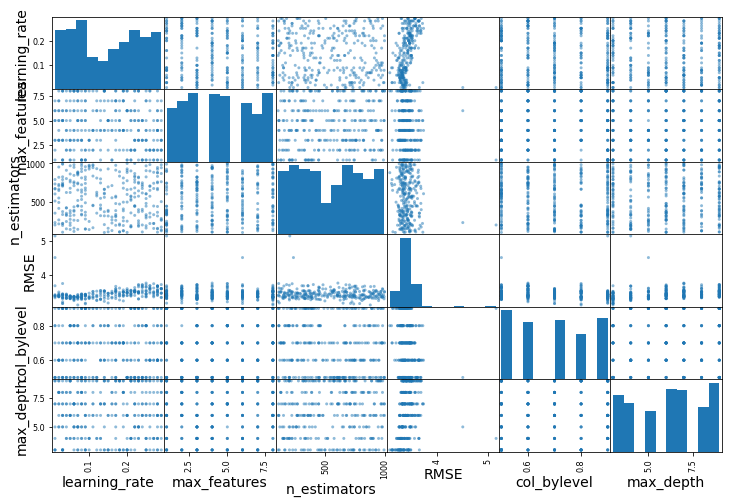

In [80]:
#correlation scatter plot between all hyperparameters
from pandas.plotting import scatter_matrix
scatter_matrix(hyperparam_rmse[hyperparam_rmse.columns.values.tolist()], figsize=(12, 8))

In [81]:
#best param from random search
rnd_search.best_params_

{'colsample_bylevel': 0.7999999999999999,
 'learning_rate': 0.06999999999999999,
 'max_depth': 3,
 'max_features': 8,
 'n_estimators': 879}

In [82]:
rnd_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.7999999999999999, colsample_bynode=1,
             colsample_bytree=1, gamma=0, importance_type='gain',
             learning_rate=0.06999999999999999, max_delta_step=0, max_depth=3,
             max_features=8, min_child_weight=1, missing=None, n_estimators=879,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)

In [83]:
#Feature importance for outcomes of both grid search and random search
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances2 = rnd_search.best_estimator_.feature_importances_
print("Grid:", feature_importances)
print("Random:", feature_importances2)

Grid: [0.01174905 0.00153061 0.03311787 0.06493446 0.15821946 0.00462633
 0.0248384  0.0079141  0.00572075 0.21716315 0.00769479 0.3796359
 0.02036738 0.06248768]
Random: [0.01244809 0.00586484 0.01195781 0.0709832  0.26706585 0.00892041
 0.04513846 0.00765014 0.02193908 0.10747692 0.01202468 0.33645576
 0.02770321 0.06437153]


In [84]:
#Percentage of importance of features for lowest RMSE model(from GridSearch CV)
attributes = num_attribs 
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3796359, 'LSTAT'),
 (0.21716315, 'PTRATION'),
 (0.15821946, 'RM'),
 (0.06493446, 'NOX'),
 (0.062487677, 'tax_per_rm'),
 (0.033117868, 'INDUS'),
 (0.024838403, 'DIS'),
 (0.020367378, 'dis_rad'),
 (0.011749049, 'CRIM'),
 (0.007914097, 'RAD'),
 (0.007694794, 'B'),
 (0.0057207476, 'TAX'),
 (0.0046263332, 'AGE'),
 (0.0015306107, 'ZN')]

## Final Model RMSE

In [85]:
final_model = grid_search.best_estimator_
final_model_randomSearchCV = rnd_search.best_estimator_

X_test = strat_test_set.drop("PRICE", axis=1)
y_test = strat_test_set["PRICE"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_predictions_2 = final_model_randomSearchCV.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_mse_rand = mean_squared_error(y_test, final_predictions_2)
final_rmse = np.sqrt(final_mse) #FINAL RMSE from GridSearch CV after fine-tuning
final_rmse_rand = np.sqrt(final_mse_rand) #RMSE from Random Search CV

print("Final RMSE:",final_rmse)


Final RMSE: 3.160936369905892


In [86]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, final_predictions)
lin_mae

2.073353032504811

In [87]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([2.11767303, 3.93681323])

# Solution and Analysis

After performing an analysis of the Boston House Prices data, I was able to conclude that the XGBoost model produced the most optimal and minimum RMSE score of 3.160936369905892.   Initially, I evaluated the RMSE scores for a linear model (3.8327260450143), a decision tree model (4.392862838872203), a random forest regressor mode ( 3.35428962136179), and a XG Boost model (3.105650418473128) using the validation set and the training set.  The XG Boost model without any hyper parameter tuning had the lowest RMSE score when using the validation set and the second to lowest RMSE score when using the training set, which is why I chose it as the model to train.  To evaluate the model, I followed through with a 5-fold cross validation.  Initially, to gauge where my model’s RMSE score was without hyperparameter tuning, I used the hyperparameter values/ranges used for the California housing dataset, which resulted in an RMSE score between 3.7-3.9.  I believe this score was already optimized to an extent because prior to training my model I added two features (dis_rad, tax_per_rm) during the feature engineering step which ended up having strong correlations to the median value, one of which also had a relatively high importance in the gridsearch._best_estimator.  Likewise prior to training my model, I performed stratified sampling on my data to redistribute it to a more normal/bell-shaped distribution using the redistributed column for the ‘DIS’ feature (‘dist_cat’).  I chose this feature to redistribute because of how tail-heavy it’s histogram was.  With regards to hyperparameter tuning, I utilized  RandomSearch CV as a starting point and then slowly decreased the scope of values and changed my ranges that resulted in smaller RMSE values.  I started to reach a plateau for my minimum RMSE value of 3.4299 for my testing set and RMSE values ~3.16 for my validation set with the following hyper parameter values:  {'max_features': 5, n_estimators: 279, default ‘learning rate’: 0.1}.  Consequently, I  tried to increase the number of iterations the RandomSearch CV ran by making it factors of 100, to increase my sample size.  However, this change made no difference as the validation set RMSE still ranged between 3.16-3.17.  I believe this is attributed to the fact that RandomSearch CV doesn’t take into account hyperparameter values that were already tested out in a previous iteration and returns repeated values.  Next, I decided to tune hyperparameters specific to the XGBoost model including 'colsample_bylevel’, ‘learning_rate’, and ‘max_depth’.  I followed a similar process with using RandomSearch CV as a starting point and narrowed down my choices for the Grid Search hyperparameter values.  Eventually, this resulted in my optimal RMSE score of 3.160936369905892 with hyperparameter values of {'colsample_bylevel': 0.5, 'learning_rate': 0.101, 'max_depth': 7, 'max_features': 7, 'n_estimators': 198}.  Some limitations of my system include the handling of capped data and the year the data was collected in.  With regards to capped data, the AGE and PRICE (Median House value) attributes are capped.  This in turn teaches the machine learning algorithms used in this analysis that house prices and age do not go above the capped threshold, which could be a problem in predicting future prices.  Additionally, the dataset used contains data that was collected in the 1970s where modern day development in technology, the job market, and societal issues didn’t exist.  Consequently, the data is not applicable to today’s time and may incorrectly predict modern day Boston house prices. 

